In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#paramaters
#change all units to: force = pN, length = nm, time = ms
pars = {}
pars['a00'] = -21*10**-3
pars['a01'] = 1
pars['a10'] = -1.35
pars['a11'] = -1
pars['gamma0'] = 8.72
pars['gamma1'] = 54.8

pars['kbT'] = 4.1
pars['noise0'] = 2*pars['gamma0']*pars['kbT']
pars['noise1'] = 4.916*(1e3)

pars['delta_t'] = 0.01
pars['n_realizations'] = 100

In [3]:
def analytical_soln_acf_generic(omega_list, pars):

    autocorr_list = []
    for omega in omega_list:
        numerator = ( pars['a11']**2 * pars['noise0'] ) \
        + ( pars['a01']**2 * pars['noise1'] ) \
        + ( (omega**2) * (pars['gamma1']**2) * (pars['noise0']) )

        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )

        autocorr = numerator/denominator
        autocorr_list.append(autocorr)
    return autocorr_list

In [4]:
def analytical_soln_real_response(omega_list, pars):
    real_response_list = []
    for omega in omega_list:
        numerator = - (omega**2)*(pars['gamma1']**2)*pars['a00'] \
        - (pars['a11']**2)*pars['a00'] \
        + pars['a10']*pars['a01']*pars['a11']
        
        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )
        
        real_response = numerator/denominator
        real_response_list.append(real_response)
    return real_response_list

In [5]:
def analytical_soln_imaginary_response(omega_list, pars):
    im_response_list = []
    for omega in omega_list:
        numerator = omega*(
            (pars['gamma1']*pars['a10']*pars['a01']) \
            + (pars['gamma0']*(pars['gamma1']**2)*(omega**2)) \
            + ((pars['a11']**2)*pars['gamma0'])
        )
        
        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )

        
        im_response = numerator/denominator
        im_response_list.append(im_response)
    return im_response_list

In [6]:
omega_list = np.linspace(-0.5, 0.5, 1000)
def calculate_energy_diss(pars, omega_list):
    
    paper_acf_soln = analytical_soln_acf_generic(omega_list, pars)
    paper_imaginary_soln = analytical_soln_imaginary_response(omega_list, pars)
    final_imaginary = (np.array(2*pars['kbT'])*np.array(paper_imaginary_soln))/omega_list

    delta_omega = omega_list[1] - omega_list[0]
    omega_squared = (omega_list)**2

    #paper_acf_soln is autocrrelation function
    #final_imaginary is imaginary of response function * (2*kBT/omega)
    violation_function = (pars['gamma0']/(2*np.pi))*(omega_squared*paper_acf_soln - omega_squared*final_imaginary)
    #energy dissipated is the integral of the violation_function
    energy_diss = np.sum(violation_function*delta_omega)
    return energy_diss, paper_acf_soln, final_imaginary

def plotter(pars, omega_list, paper_acf_soln, final_imaginary):

    plt.plot(omega_list/(2*np.pi), np.array(paper_acf_soln),  label='$\~{C} (\omega)$')
    plt.plot(omega_list/(2*np.pi), np.array(final_imaginary), color='red', label="$\\frac{2K_bT}{\omega} \~{R}'' (\omega)$")
    plt.xlabel('$\omega$ (Hz)')
    plt.ylabel('$nm^2$ $ms$')
    plt.legend()
    plt.show()

In [10]:
np.arange(-1.35, 1 + 0.05 , 0.05) 

array([-1.35000000e+00, -1.30000000e+00, -1.25000000e+00, -1.20000000e+00,
       -1.15000000e+00, -1.10000000e+00, -1.05000000e+00, -1.00000000e+00,
       -9.50000000e-01, -9.00000000e-01, -8.50000000e-01, -8.00000000e-01,
       -7.50000000e-01, -7.00000000e-01, -6.50000000e-01, -6.00000000e-01,
       -5.50000000e-01, -5.00000000e-01, -4.50000000e-01, -4.00000000e-01,
       -3.50000000e-01, -3.00000000e-01, -2.50000000e-01, -2.00000000e-01,
       -1.50000000e-01, -1.00000000e-01, -5.00000000e-02,  1.11022302e-15,
        5.00000000e-02,  1.00000000e-01,  1.50000000e-01,  2.00000000e-01,
        2.50000000e-01,  3.00000000e-01,  3.50000000e-01,  4.00000000e-01,
        4.50000000e-01,  5.00000000e-01,  5.50000000e-01,  6.00000000e-01,
        6.50000000e-01,  7.00000000e-01,  7.50000000e-01,  8.00000000e-01,
        8.50000000e-01,  9.00000000e-01,  9.50000000e-01,  1.00000000e+00,
        1.05000000e+00])

a01 1
a10 -1.35


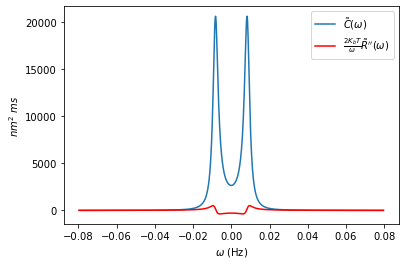

a01 1
a10 1


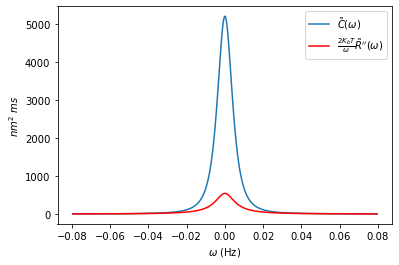

In [12]:
a10_list_plotter = [-1.35,1] 

for i in a10_list_plotter:
    pars['a10'] = i
    print('a01', pars['a01'])
    print('a10', pars['a10'])
    energy_diss, paper_acf_soln, final_imaginary = calculate_energy_diss(pars, omega_list)
    plotter(pars, omega_list, paper_acf_soln, final_imaginary)

In [ ]:
a10_list = np.arange(-1.35, 1 +0.1 , 0.15)

energy_diss_list = []
for i in tqdm(a10_list):
    pars['a10'] = i
    energy_diss, paper_acf_soln, final_imaginary = calculate_energy_diss(pars, omega_list)
    energy_diss_list.append(energy_diss)